# Featurization, Model Selection & Tuning Project

### Attribute Information:  
  ● Cement : measured in kg in a m3 mixture  
  ● Blast : measured in kg in a m3 mixture  
  ● Fly ash : measured in kg in a m3 mixture  
  ● Water : measured in kg in a m3 mixture  
  ● Superplasticizer : measured in kg in a m3 mixture  
  ● Coarse Aggregate : measured in kg in a m3 mixture  
  ● Fine Aggregate : measured in kg in a m3 mixture  
  ● Age : day (1~365)  
  ● Concrete compressive strength measured in MPa

### Import the necessary libraries

Necessary libaries for EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

Necessary libaries for Machine Learning

In [2]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures

# Machine Learning Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from xgboost import XGBRegressor

### Read the data as a data frame

In [3]:
data = pd.read_csv('concrete.csv')
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


Copying data to preserve the original data

In [4]:
df = data.copy(deep = True)

Shape of Dataset

In [5]:
print('The dataset contains %d rows and %d columns.' %(df.shape[0], df.shape[1]))

The dataset contains 1030 rows and 9 columns.


Data Type of each column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Checking for number of missing values for every column

In [7]:
print('Null values:\n', df.isnull().sum())

Null values:
 cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


#### Descriptive Statistics
Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [8]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#### Inferences :
  * Slag, ash and age columns have wide difference in mean and median values - indicating mean > median
      * a right tailed skewness in data is observed
      
  * Slag, ash and superplastic columns have minimum value as 0 which is not possible in the composition of cement.
  
  * Ash column also has a median value of 0 which is unusual and unexpected.
  
  * In cement column, min = 102, std = 104.5 and range is 102 - 540. A right tailed skeweness is observed.
  
  * In water column, std < min value.

The data does not contain any missing values or special symbols, but it has 0 value in few columns which has to be treated by imputing the mean values.

In [9]:
df.slag = df.slag.replace(to_replace = 0, value = df.slag.mean())
df.ash = df.ash.replace(to_replace = 0, value = df.ash.mean())
df.superplastic = df.superplastic.replace(to_replace = 0, value = df.superplastic.mean())
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,107.687023,83.965637,181.567282,8.487734,972.918932,773.580485,45.662136,35.817961
std,104.506364,61.658049,39.911375,21.354219,4.036065,77.753954,80.175980,63.169912,16.705742
min,102.000000,11.000000,24.500000,121.800000,1.700000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,73.895825,54.188350,164.900000,6.204660,932.000000,730.950000,7.000000,23.710000
50%,272.900000,73.895825,54.188350,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Distribution Plots of all variables.

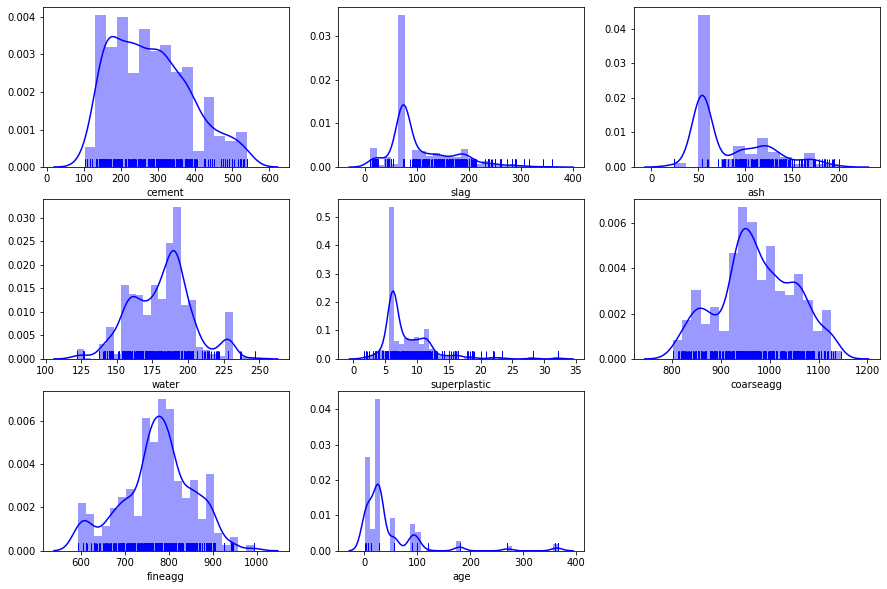

In [10]:
plt.figure(figsize=(15,10))
col = 1
for i in df.drop(columns = 'strength').columns:
    plt.subplot(3, 3, col)
    sns.distplot(df[i], color = 'b', rug = True)
    col += 1 

In [11]:
def age_bin(df):
    if df.age <= 30:
        return '1 month'
    if df.age > 30 and df.age <= 60 :
        return '2 months'
    if df.age > 60 and df.age <= 90 :
        return '3 months'
    if df.age > 90 and df.age <= 120 :
        return '4 months'
    if df.age > 120 and df.age <= 150 :
        return '5 months'
    if df.age > 150 and df.age <= 180 :
        return '6 months'
    if df.age > 180 and df.age <= 210 :
        return '7 months'
    if df.age > 210 and df.age <= 240 :
        return '8 months'
    if df.age > 240 and df.age <= 270 :
        return '9 months'
    if df.age > 270 and df.age <= 300 :
        return '10 months'
    if df.age > 300 and df.age <= 330 :
        return '11 months'
    if df.age > 330 :
        return '12 months'
df['age_in_months'] = df.apply(lambda df:age_bin(df) , axis=1)

1 month      749
2 months      91
4 months      77
3 months      54
6 months      26
12 months     20
9 months      13
Name: age_in_months, dtype: int64


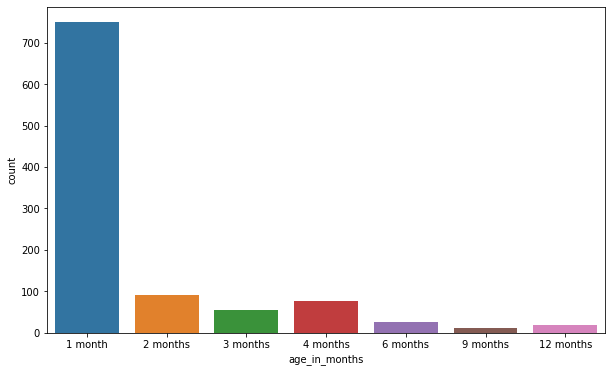

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(df['age_in_months'], order = ['1 month', '2 months', '3 months', '4 months', '6 months', '9 months', '12 months'])
print(df['age_in_months'].value_counts())

It can be seen from the above countplot that the 1 month bin has maximum occurence.

Dropping the age_in_months column for further analysis.

In [13]:
df.drop(columns = 'age_in_months', inplace = True)

Skewness of Strength:  0.41697728841071807


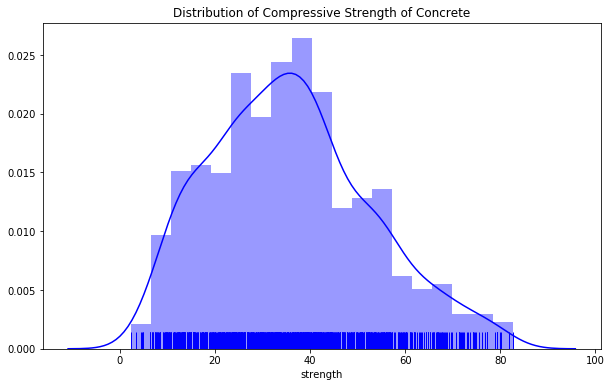

In [14]:
plt.figure(figsize=(10, 6))
sns.distplot(df.strength, color = 'b', rug = True)
plt.title('Distribution of Compressive Strength of Concrete')

print('Skewness of Strength: ', df['strength'].skew())

Boxplots- to check for outliers

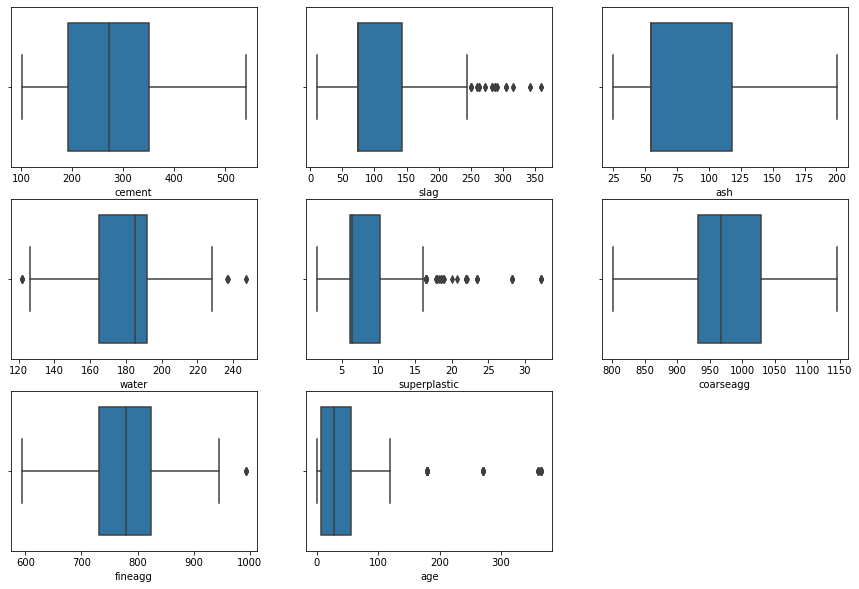

In [15]:
plt.figure(figsize=(15,10))
col = 1
for i in df.drop(columns = 'strength').columns:
    plt.subplot(3, 3, col)
    sns.boxplot(df[i])
    col += 1 

In [16]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
ol = ((df.iloc[:] < (q1 - 1.5 * IQR)) | (df.iloc[:] > (q3 + 1.5 * IQR))).sum(axis = 0)
outlierdf = pd.DataFrame(ol, index = df.columns, columns = ['No. of Outliers'])
outlierdf['Percentage Outliers (%)'] = round(outlierdf['No. of Outliers'] * 100 / len(df), 2)
outlierdf

,No. of Outliers,Percentage Outliers (%)
cement,0,0.00
slag,35,3.40
ash,0,0.00
water,9,0.87
superplastic,51,4.95
coarseagg,0,0.00
fineagg,5,0.49
age,59,5.73
strength,4,0.39


Since the percentage of outliers in the columns is less than 6 % we will leave the dataset as it is. In fact, Ensemble methods do not get affected by outliers.

Pair Plot of the original dataset

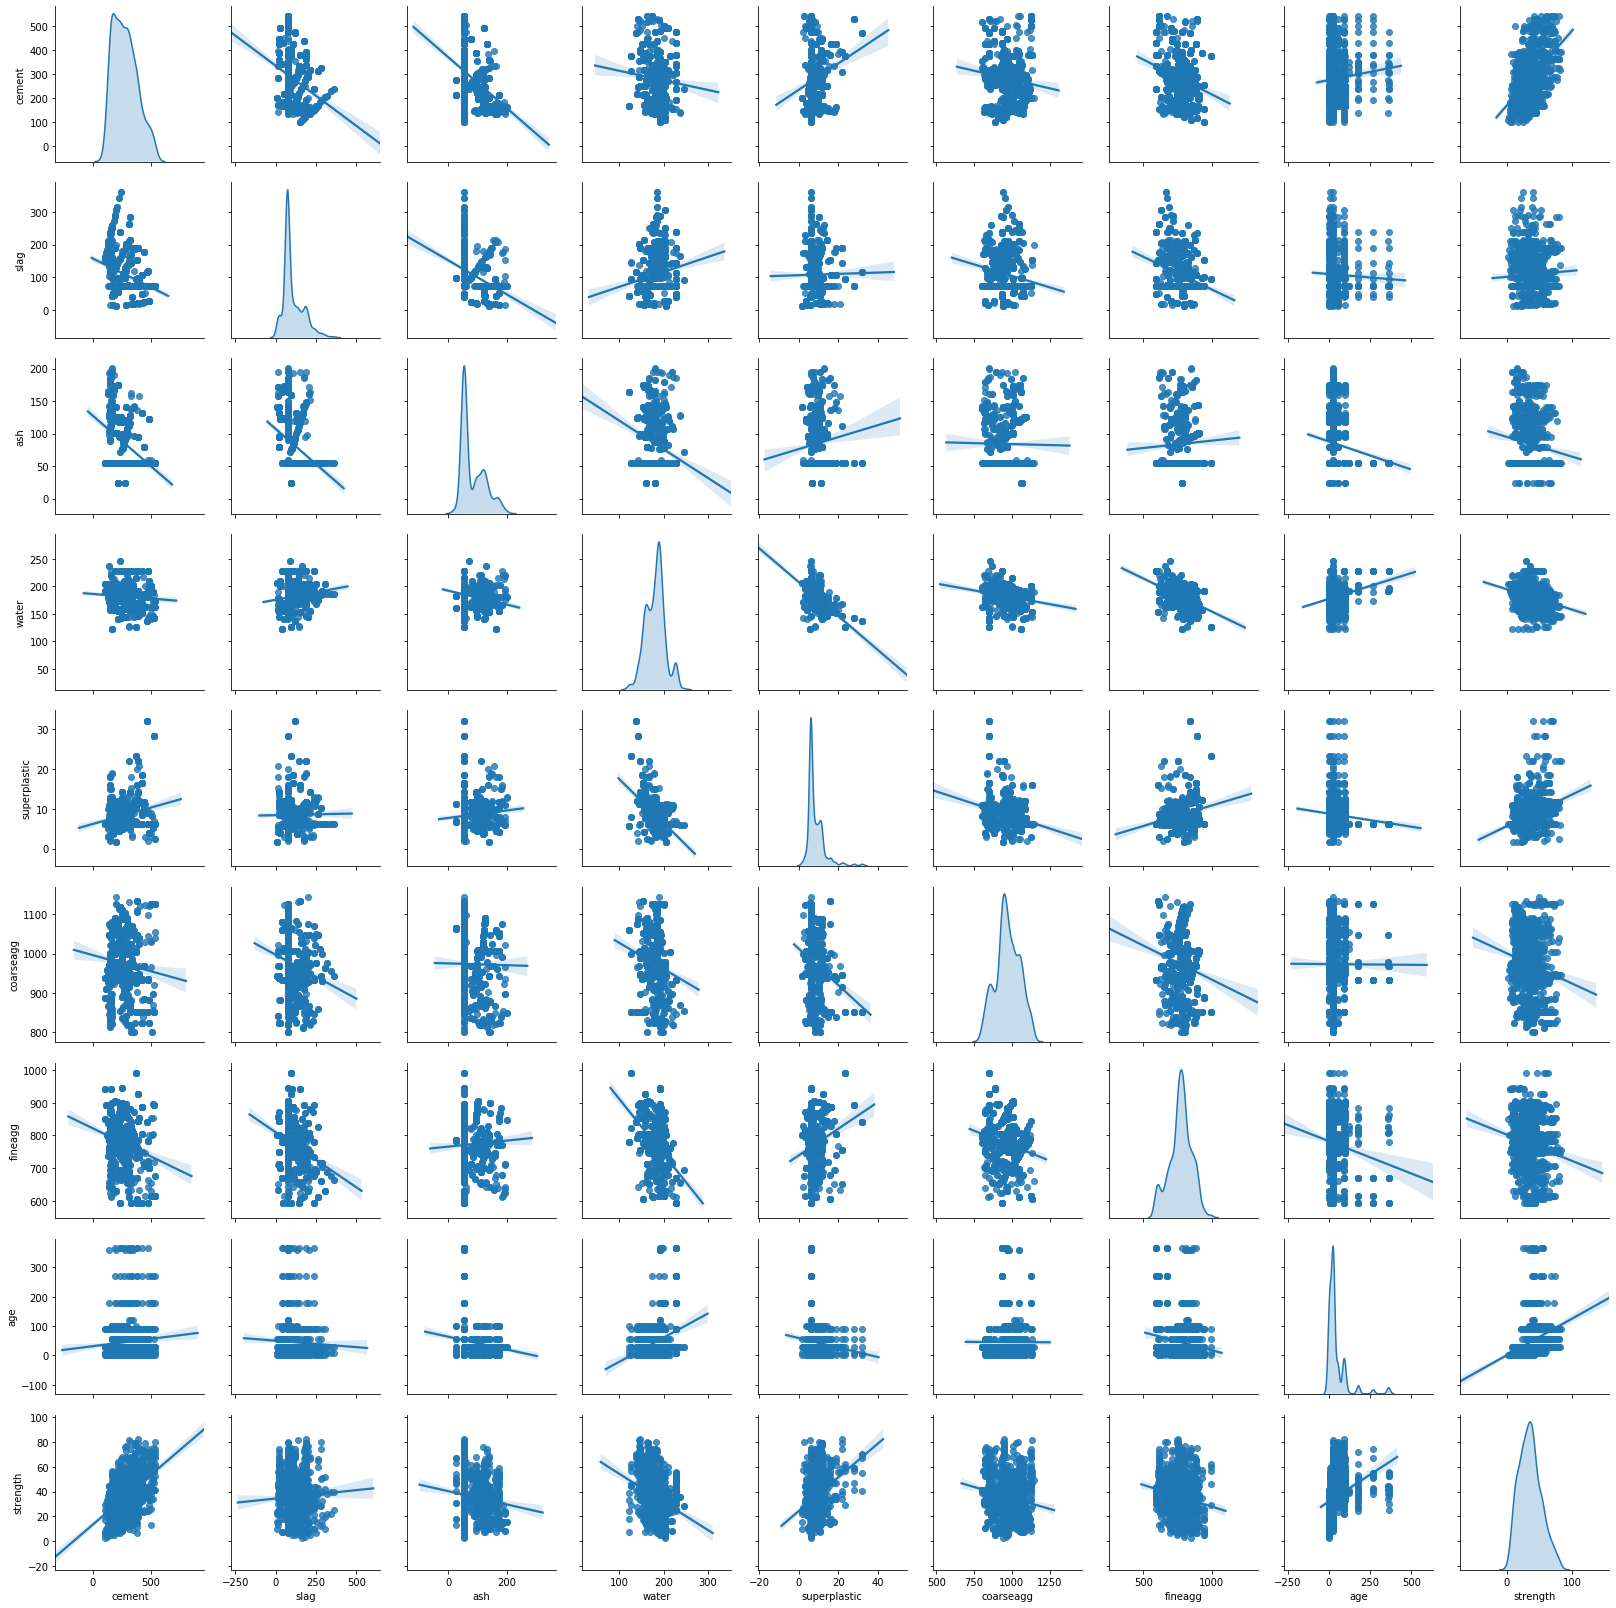

In [17]:
sns.pairplot(df, kind = 'reg', diag_kind = 'kde')

In [18]:
correlation = df.corr()
correlation

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.296360,-0.402439,-0.081587,0.211562,-0.109349,-0.222718,0.081946,0.497832
slag,-0.296360,1.000000,-0.335513,0.158120,0.013211,-0.177811,-0.260018,-0.042976,0.050145
ash,-0.402439,-0.335513,1.000000,-0.235474,0.092806,-0.011760,0.045555,-0.136655,-0.126936
water,-0.081587,0.158120,-0.235474,1.000000,-0.581564,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.211562,0.013211,0.092806,-0.581564,1.000000,-0.239907,0.205089,-0.103111,0.328293
coarseagg,-0.109349,-0.177811,-0.011760,-0.182294,-0.239907,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.260018,0.045555,-0.450661,0.205089,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.042976,-0.136655,0.277618,-0.103111,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.050145,-0.126936,-0.289633,0.328293,-0.164935,-0.167241,0.328873,1.000000


df.corr() computes pairwise correlation of columns. 
 - Correlation shows how two variables are related to each other.
 - Positive values shows as one variable increases other variable increases as well. 
 - Negative values shows as one variable increases other variable decreases.
 - Bigger values show high correlation between variables while smaller values show less correlation.

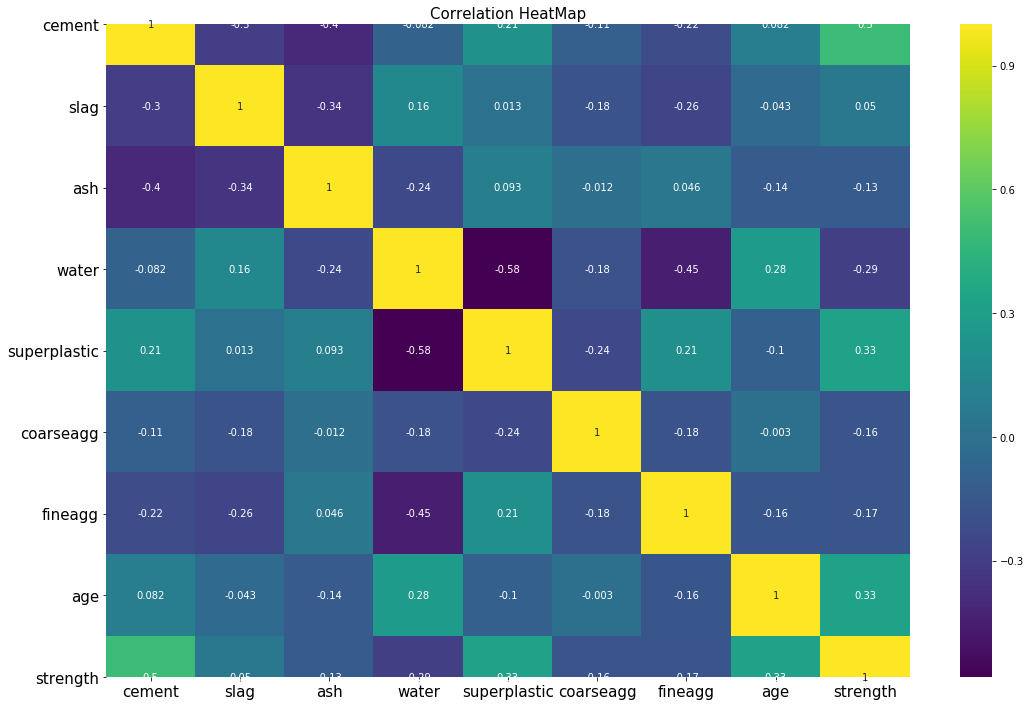

In [19]:
plt.figure(figsize = (18, 12))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Correlation HeatMap', fontsize = 15)
sns.heatmap(correlation, annot = True, cmap = 'viridis')

Combining the coarseagg and fineagg columns.

In [20]:
df['agg'] = df['coarseagg'] + df['fineagg']
df.drop(columns = ['coarseagg', 'fineagg'], inplace = True)
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'age', 'strength',
       'agg'],
      dtype='object')

Splitting the dependent and independent variables.

In [21]:
X = df.loc[:, df.columns != 'strength']
y = df['strength']

Regression plots to analyse the dependency of dependent and independent variables.

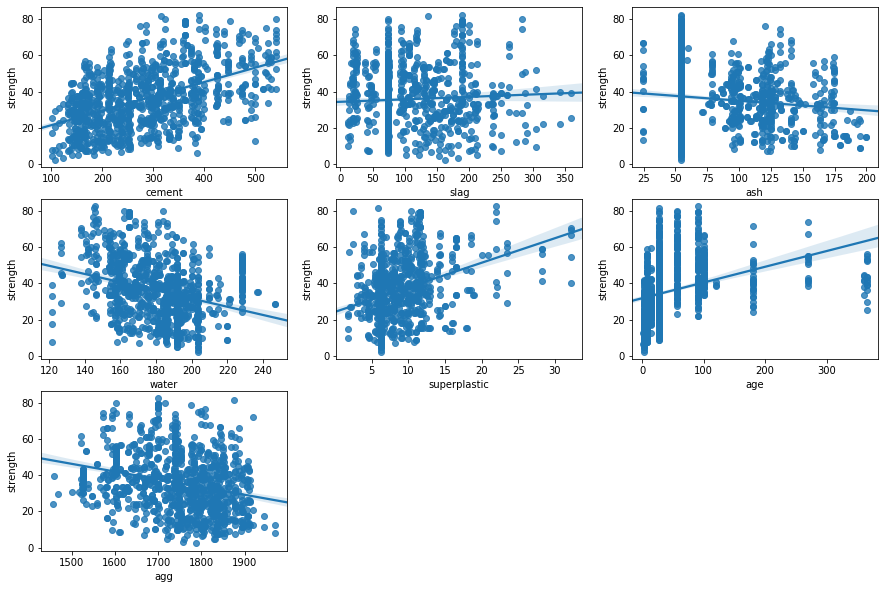

In [22]:
plt.figure(figsize=(15, 10))
col = 1
for i in df.drop(columns = 'strength').columns:
    plt.subplot(3, 3, col)
    sns.regplot(x = X[i], y = y, data = df)
    col += 1 

In [23]:
X.apply(lambda x: x.corr(y))

cement          0.497832
slag            0.050145
ash            -0.126936
water          -0.289633
superplastic    0.328293
age             0.328873
agg            -0.259130
dtype: float64

As expected, columns - cement, slag, superplastic and age have positive correlation with the strength column.

Text(0.5, 1.0, 'Correlation with Strength column')

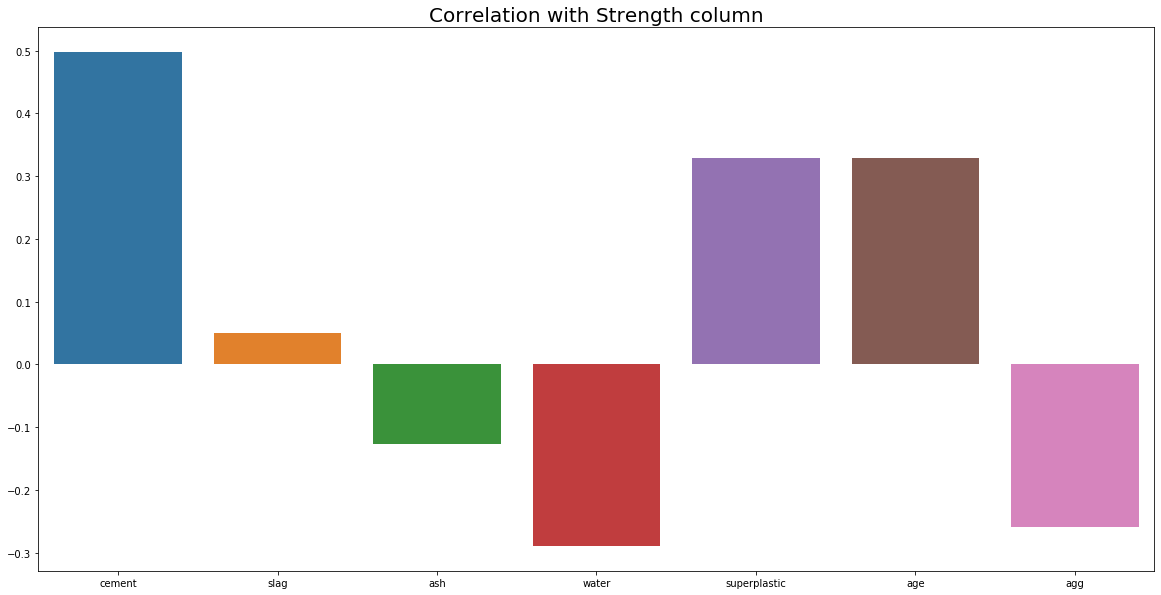

In [24]:
plt.figure(figsize = (20, 10))
sns.barplot(x = X.columns, y = X.corrwith(y))
plt.title('Correlation with Strength column', fontsize = 20)

#### Inferences:
From the above barplot and the regression plot, it is evident that:
  * The columns cement, age and superplastic have good positive correlation with the strength column
  * Water column has the maximum negative correlation with the strength column
  * The other columns-
      * slag shows positive correlation with the strength column
      * ash and agg (coarseagg + fineagg) columns show negative correlation with the strength column

3D plot for cement ,compressive strength and super plasticizer
 * X - Axis = Cement.
 * Y - Axis = Compressive Strength of Cement.
 * Z - Axis = Super Plasticizer.
 * Color = Age

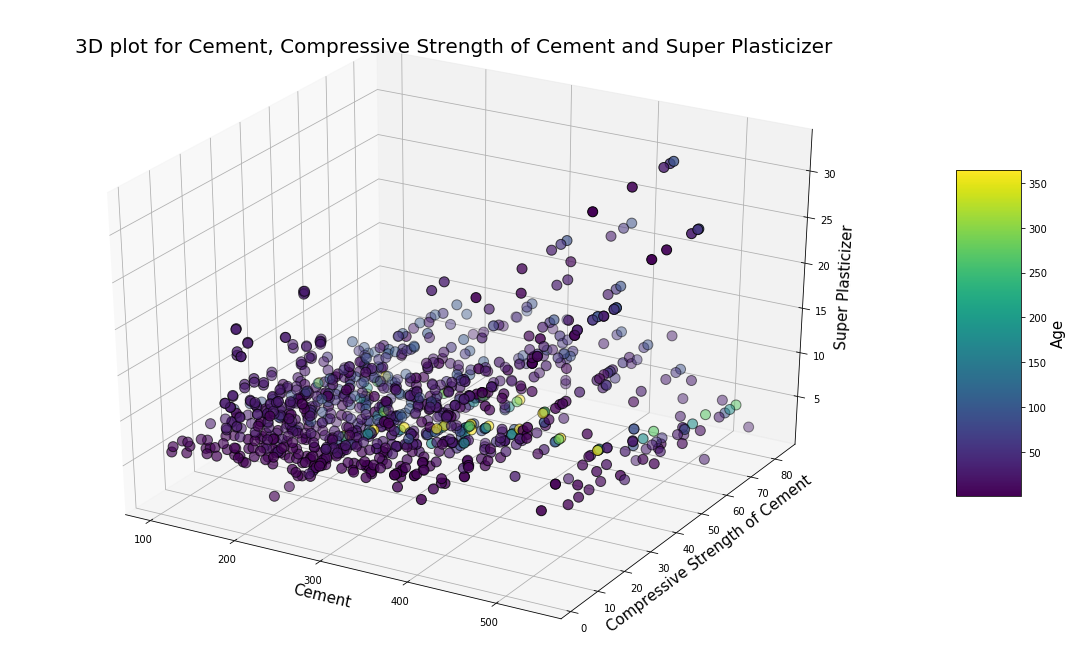

In [25]:
fig = plt.figure(figsize = (20, 12))

ax  = fig.gca(projection = '3d')

plot =  ax.scatter(df['cement'], df['strength'], df['superplastic'], linewidth = 1, edgecolor = 'k', c = df['age'],
                   s = 100, cmap = 'viridis')

ax.set_xlabel('Cement', fontsize = 15)
ax.set_ylabel('Compressive Strength of Cement', fontsize = 15)
ax.set_zlabel('Super Plasticizer', fontsize = 15)

lab = fig.colorbar(plot, shrink = 0.5, aspect = 5)
lab.set_label('Age', fontsize = 15)

plt.title('3D plot for Cement, Compressive Strength of Cement and Super Plasticizer', fontsize = 20)
plt.show()

Using Robust Scaler to standardize the values of each column. This is required in order to bring the input variables on same scale, which might be on different scales in the raw form.

In [26]:
X_col = X.columns
scaler = RobustScaler()
X_std = pd.DataFrame(scaler.fit_transform(X))
X_std.columns = X_col #the column names are passed to the standardized dataframe
X_std.head()

,cement,slag,ash,water,superplastic,age,agg
0,-0.834893,1.999940,0.000000,0.682657,-0.048892,0.000000,-0.218865
1,-0.659794,-0.458999,1.093587,-0.985240,1.101283,-0.285714,0.833165
2,-0.145282,0.000000,0.647490,0.088561,-0.225262,0.000000,0.437731
3,-0.043775,0.580764,0.000000,1.586716,-0.048892,0.000000,-1.013092
4,-0.749247,1.585772,0.000000,0.306273,0.675787,0.000000,-0.059080


Splitting the data into training (70%), validation (15%) and test (15%) dataset.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.15, random_state = 7)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.177, random_state = 16)

In [28]:
print('The training dataset contains %d rows.' %X_train.shape[0])
print('The validation dataset contains %d rows.' %X_val.shape[0])
print('The test dataset contains %d rows.' %X_test.shape[0])

The training dataset contains 720 rows.
The validation dataset contains 155 rows.
The test dataset contains 155 rows.


### Linear Regressor

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

coef = lr.coef_

for i, col_name in enumerate(X_train.columns):
    print('The coefficient for %s is %f' %(col_name, coef[i]))

print('\nThe intercept for our model is %f' %(lr.intercept_))

y_pred_lr_tr = lr.predict(X_train)
y_pred_lr_val = lr.predict(X_val)

lr_tr_score = r2_score(y_train, y_pred_lr_tr)
lr_val_score = r2_score(y_val, y_pred_lr_val)

print('\n\nTrain R2 score: ', lr_tr_score)
print('Validation R2 score: ', lr_val_score)

The coefficient for cement is 9.160172
The coefficient for slag is 2.686804
The coefficient for ash is -0.198299
The coefficient for water is -13.446058
The coefficient for superplastic is -1.508765
The coefficient for age is 5.289471
The coefficient for agg is -9.029487

The intercept for our model is 30.615755


Train R2 score:  0.5662967748915888
Validation R2 score:  0.6492022932990215


Text(0.5, 1.0, 'Feature Importances of Linear Regression Model')

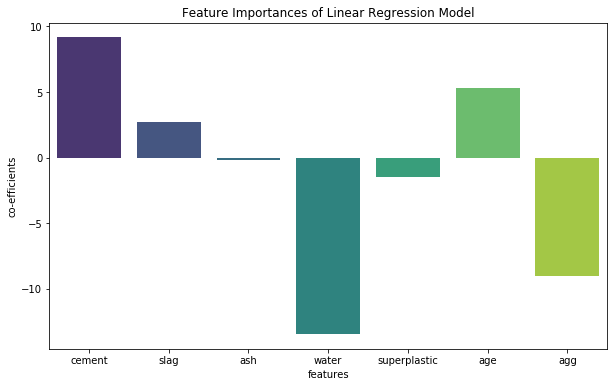

In [30]:
coef = pd.DataFrame(lr.coef_.ravel())
coef['features'] = X_train.columns

plt.figure(figsize = (10, 6))
sns.barplot(coef['features'], coef[0], palette = 'viridis')

plt.ylabel('co-efficients')
plt.xlabel('features')
plt.title('Feature Importances of Linear Regression Model')

### Ridge Regressor

In [31]:
ridge = Ridge(alpha = 0.3)
ridge.fit(X_train, y_train)

for i, col_name in enumerate(X_train.columns):
    print('The coefficient for %s is %f' %(col_name, ridge.coef_[i]))

y_pred_ridge_tr = ridge.predict(X_train)
y_pred_ridge_val = ridge.predict(X_val)

ridge_tr_score = r2_score(y_train, y_pred_ridge_tr)
ridge_val_score = r2_score(y_val, y_pred_ridge_val)

print('\n\nTrain R2 score: ', ridge_tr_score)
print('Validation R2 score: ', ridge_val_score)

The coefficient for cement is 9.167967
The coefficient for slag is 2.692691
The coefficient for ash is -0.183979
The coefficient for water is -13.407184
The coefficient for superplastic is -1.492258
The coefficient for age is 5.286045
The coefficient for agg is -8.995584


Train R2 score:  0.5662956087413105
Validation R2 score:  0.64915112437315


Text(0.5, 1.0, 'Feature Importances of Ridge Regression Model')

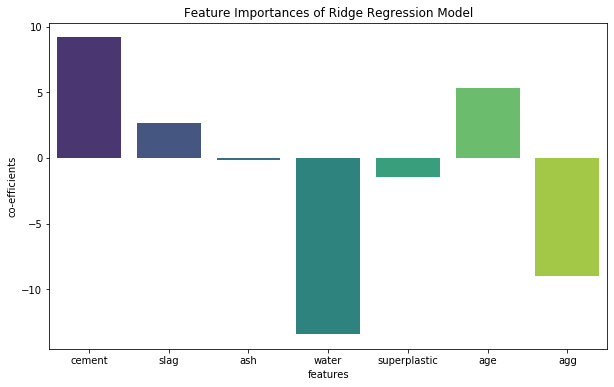

In [32]:
coef = pd.DataFrame(ridge.coef_.ravel())
coef['features'] = X_train.columns

plt.figure(figsize = (10, 6))
sns.barplot(coef['features'], coef[0], palette = 'viridis')

plt.ylabel('co-efficients')
plt.xlabel('features')
plt.title('Feature Importances of Ridge Regression Model')

### Lasso Regressor

In [33]:
lasso = Lasso(alpha = 0.5)
lasso.fit(X_train, y_train)
print('Lasso Model:')
for i, col_name in enumerate(X_train.columns):
    print('The coefficient for %s is %f' %(col_name, lasso.coef_[i]))
    
y_pred_lasso_tr = lasso.predict(X_train)
y_pred_lasso_val = lasso.predict(X_val)

lasso_tr_score = r2_score(y_train, y_pred_lasso_tr)
lasso_val_score = r2_score(y_val, y_pred_lasso_val)

print('\n\nTrain R2 score: ', lasso_tr_score)
print('Validation R2 score: ', lasso_val_score)

Lasso Model:
The coefficient for cement is 8.380268
The coefficient for slag is 1.918298
The coefficient for ash is -0.000000
The coefficient for water is -10.233365
The coefficient for superplastic is 0.000000
The coefficient for age is 4.768662
The coefficient for agg is -6.740450


Train R2 score:  0.5528959925121741
Validation R2 score:  0.6202457161509373


Text(0.5, 1.0, 'Feature Importances of Lasso Regression Model')

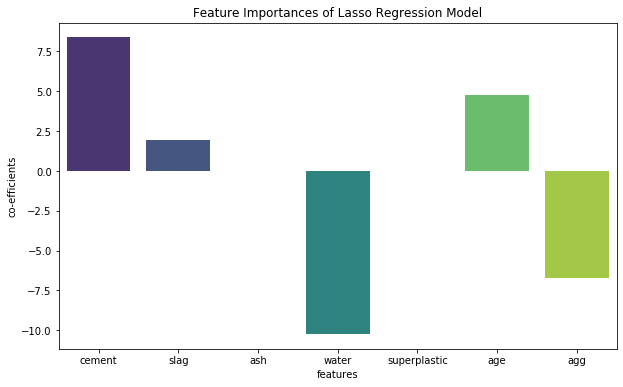

In [34]:
coef = pd.DataFrame(lasso.coef_.ravel())
coef['features'] = X_train.columns

plt.figure(figsize = (10, 6))
sns.barplot(coef['features'], coef[0], palette = 'viridis')

plt.ylabel('co-efficients')
plt.xlabel('features')
plt.title('Feature Importances of Lasso Regression Model')

### Polynomial Regressor (degree = 2)

In [35]:
poly_2 = PolynomialFeatures(degree = 2, interaction_only = True) #taking features that show correlation

X_poly_tr = poly_2.fit_transform(X_train)
lr.fit(X_poly_tr, y_train)

y_pred_lr_poly2_tr = lr.predict(X_poly_tr)

lr_poly_2_tr_score = r2_score(y_train, y_pred_lr_poly2_tr)
print('Train R2 Score - 2 degree polynomial: ', lr_poly_2_tr_score)

X_poly_val = poly_2.fit_transform(X_val)
y_pred_lr_poly2_val = lr.predict(X_poly_val)

lr_poly_2_val_score = r2_score(y_val, y_pred_lr_poly2_val)
print('Validation R2 Score - 2 degree polynomial: ', lr_poly_2_val_score)

Train R2 Score - 2 degree polynomial:  0.7060198419099895
Validation R2 Score - 2 degree polynomial:  0.7043274543229329


### Polynomial Regressor (degree = 3)

In [36]:
poly_3 = PolynomialFeatures(degree = 3, interaction_only = True) #taking features that show correlation

X_poly3_tr = poly_3.fit_transform(X_train)
lr.fit(X_poly3_tr, y_train)

y_pred_lr_poly3_tr = lr.predict(X_poly3_tr)

lr_poly_3_tr_score = r2_score(y_train, y_pred_lr_poly3_tr)
print('Train R2 Score - 3 degree polynomial: ', lr_poly_3_tr_score)

X_poly3_val = poly_3.fit_transform(X_val)
y_pred_lr_poly3_val = lr.predict(X_poly3_val)

lr_poly_3_val_score = r2_score(y_val, y_pred_lr_poly3_val)
print('Validation R2 Score - 3 degree polynomial: ', lr_poly_3_val_score)

Train R2 Score - 3 degree polynomial:  0.7590518416934784
Validation R2 Score - 3 degree polynomial:  0.7499270798919517


### DecisionTree Regressor

In [37]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred_dt_tr = dt.predict(X_train)
y_pred_dt_val = dt.predict(X_val)

dt_tr_score = r2_score(y_train, y_pred_dt_tr)
dt_val_score = r2_score(y_val, y_pred_dt_val)

print('Train R2 score: ', dt_tr_score)
print('Validation R2 score: ', dt_val_score)

Train R2 score:  0.9991575747279653
Validation R2 score:  0.748576669897835


The fully grown tree is overfitting. This can be controlled by pruning the tree. Using grid search we can find the optimum  hyper parameters.

In [38]:
param_grid = {'max_depth': np.arange(3, 8),
             'criterion' : ['mse','mae'],
             'max_leaf_nodes': [5, 10, 20, 100],
             'min_samples_split': [2, 5, 10, 20]}

grid_tree_dt = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5, scoring= 'r2')
grid_tree_dt.fit(X_train, y_train)
print(grid_tree_dt.best_estimator_)
print('R Squared :', np.abs(grid_tree_dt.best_score_))

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=100, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
R Squared : 0.7676273143346498


In [39]:
#using the above parameters as suggested by GridSearch
dtpr = DecisionTreeRegressor(criterion = 'mse', max_depth = 7, max_features = None,
                      max_leaf_nodes = 100, min_impurity_decrease = 0.0,
                      min_impurity_split = None, min_samples_leaf = 1,
                      min_samples_split = 10, min_weight_fraction_leaf = 0.0,
                      presort = False, random_state = None, splitter = 'best')
dtpr.fit(X_train,y_train)
dtpr.score(X_train, y_train)
y_pred_dtpr_tr = dtpr.predict(X_train)
y_pred_dtpr_val = dtpr.predict(X_val)

dtpr_tr_score = r2_score(y_train, y_pred_dtpr_tr)
print('Train R2 score: ', dtpr_tr_score)

dtpr_val_score = r2_score(y_val, y_pred_dtpr_val)
print('Validation R2 score: ', dtpr_val_score)

Train R2 score:  0.9008135856690955
Validation R2 score:  0.7597491588912945


The model still overfits. We need to further tune the model.

In [40]:
param_grid = {'max_depth': np.arange(3, 6),
             'criterion' : ['mse','mae'],
             'max_leaf_nodes': [100, 105, 90, 95],
             'min_samples_split': [6, 7, 8, 9, 10],
             'max_features':[2, 3, 4, 5, 6]}

grid_tree_dt = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5, scoring= 'r2')
grid_tree_dt.fit(X_train, y_train)
print(grid_tree_dt.best_estimator_)
print('R Squared :', np.abs(grid_tree_dt.best_score_))

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=5,
                      max_leaf_nodes=105, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
R Squared : 0.7298877710017984


In [41]:
#using the above parameters as suggested by GridSearch
dtpr = DecisionTreeRegressor(criterion = 'mse', max_depth = 5, max_features = 6,
                      max_leaf_nodes = 95, min_impurity_decrease = 0.0,
                      min_impurity_split = None, min_samples_leaf = 1,
                      min_samples_split = 6, min_weight_fraction_leaf = 0.0,
                      presort = False, random_state = None, splitter = 'best')
dtpr.fit(X_train,y_train)
dtpr.score(X_train, y_train)
y_pred_dtpr_tr = dtpr.predict(X_train)
y_pred_dtpr_val = dtpr.predict(X_val)

dtpr_tr_score = r2_score(y_train, y_pred_dtpr_tr)
print('Train R2 score: ', dtpr_tr_score)

dtpr_val_score = r2_score(y_val, y_pred_dtpr_val)
print('Validation R2 score: ', dtpr_val_score)

Train R2 score:  0.8150046010457103
Validation R2 score:  0.7869219188712929


As can be seen that the overfit has reduced but the model performance has not imporoved on the validation data. 

Now let's check the feature importance of all the columns.

Text(0.5, 1.0, 'Feature Importances of DecisionTree Regressor Model')

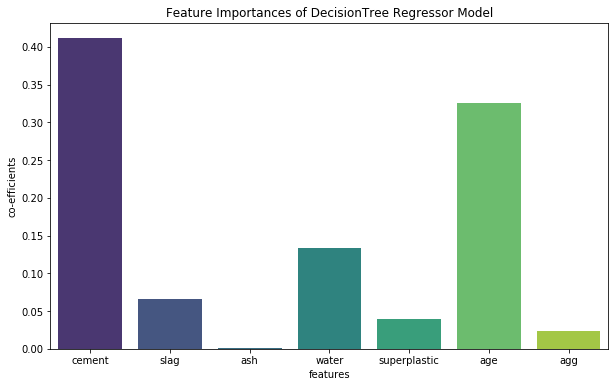

In [42]:
coef = pd.DataFrame(dtpr.feature_importances_)
coef['features'] = X_train.columns

plt.figure(figsize = (10, 6))
sns.barplot(coef['features'], coef[0], palette = 'viridis')

plt.ylabel('co-efficients')
plt.xlabel('features')
plt.title('Feature Importances of DecisionTree Regressor Model')

### AdaBoost Regressor

In [43]:
adb = AdaBoostRegressor(random_state = 7, n_estimators = 100)
adb.fit(X_train, y_train)

y_pred_adb_tr = adb.predict(X_train)
y_pred_adb_val = adb.predict(X_val)

adb_tr_score = r2_score(y_train, y_pred_adb_tr)
adb_val_score = r2_score(y_val, y_pred_adb_val)

print('Train R2 score: ', adb_tr_score)
print('Validation R2 score: ', adb_val_score)

Train R2 score:  0.8148342639746413
Validation R2 score:  0.7926965586788601


Adaboost has reduced the variance and improved the model performance as well.

Now let's check the feature importance of all the columns.

Text(0.5, 1.0, 'Feature Importances of AdaBoost Regressor Model')

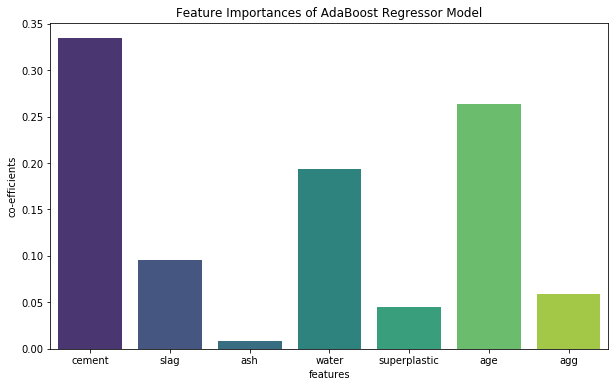

In [44]:
coef = pd.DataFrame(adb.feature_importances_)
coef['features'] = X_train.columns

plt.figure(figsize = (10, 6))
sns.barplot(coef['features'], coef[0], palette = 'viridis')

plt.ylabel('co-efficients')
plt.xlabel('features')
plt.title('Feature Importances of AdaBoost Regressor Model')

### RandomForest Regressor

In [45]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred_rf_tr = rf.predict(X_train)
y_pred_rf_val = rf.predict(X_val)

rf_tr_score = r2_score(y_train, y_pred_rf_tr)
rf_val_score = r2_score(y_val, y_pred_rf_val)

print('Train R2 score: ', rf_tr_score)
print('Validation R2 score: ', rf_val_score)

Train R2 score:  0.9805461644410185
Validation R2 score:  0.868674978740078


The random forest model has improved the model performance but is an overfitting model. So we will now tune the hyper- parameters to reduce the overfit.

In [46]:
param_grid = {'max_depth': np.arange(3, 8),
             'criterion' : ['mse','mae'],
             'max_leaf_nodes': [100, 105, 90, 95],
             'min_samples_split': [6, 7, 8, 9, 10],
             'max_features':['auto','sqrt','log2']}

grid_tree_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv = 5, scoring= 'r2')
grid_tree_rf.fit(X_train, y_train)
print(grid_tree_rf.best_estimator_)
print('R Squared :', np.abs(grid_tree_rf.best_score_))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=95,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=9,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
R Squared : 0.8535266049976258


In [47]:
rfr = RandomForestRegressor(bootstrap = True, criterion = 'mse', max_depth = 7,
                      max_features = 'auto', max_leaf_nodes = 105,
                      min_impurity_decrease = 0.0, min_impurity_split = None,
                      min_samples_leaf = 1, min_samples_split = 8,
                      min_weight_fraction_leaf = 0.0, n_estimators = 10,
                      n_jobs = None, oob_score = False, random_state = None,
                      verbose = 0, warm_start = False)
rfr.fit(X_train, y_train)

y_pred_rfr_tr = rfr.predict(X_train)
y_pred_rfr_val = rfr.predict(X_val)

rfr_tr_score = r2_score(y_train, y_pred_rfr_tr)
rfr_val_score = r2_score(y_val, y_pred_rfr_val)

print('Train R2 score: ', rfr_tr_score)
print('Validation R2 score: ', rfr_val_score)

Train R2 score:  0.9355686448146825
Validation R2 score:  0.8475166306404716


As can be seen that the overfit has reduced but the model performance has not imporoved on the validation data. 

Now let's check the feature importance of all the columns.

Text(0.5, 1.0, 'Feature Importances of RandomForest Regressor Model')

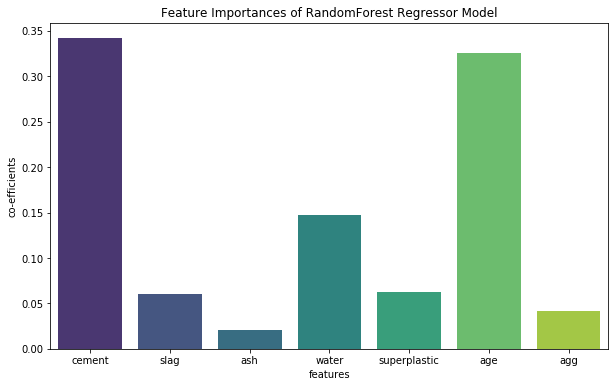

In [48]:
coef = pd.DataFrame(rfr.feature_importances_)

coef['features'] = X_train.columns

plt.figure(figsize = (10, 6))
sns.barplot(coef['features'], coef[0], palette = 'viridis')

plt.ylabel('co-efficients')
plt.xlabel('features')
plt.title('Feature Importances of RandomForest Regressor Model')

### Gradient Boosting Regressor

In [49]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

y_pred_gb_tr = gb.predict(X_train)
y_pred_gb_val = gb.predict(X_val)

gb_tr_score = r2_score(y_train, y_pred_gb_tr)
gb_val_score = r2_score(y_val, y_pred_gb_val)

print('Train R2 score: ', gb_tr_score)
print('Validation R2 score: ', gb_val_score)

Train R2 score:  0.9452829784403551
Validation R2 score:  0.8956659969598748


In [50]:
param_grid = {'n_estimators': [100, 200, 250, 500],
              'max_depth': range(10, 31, 2), 
              'min_samples_split': range(50, 501, 10), 
              'learning_rate':[0.1, 0.2]}
clf = RandomizedSearchCV(GradientBoostingRegressor(random_state = 1), 
                   param_distributions = param_grid, n_iter=10, scoring = 'r2', 
                   cv = 5).fit(X_train, y_train)
print(clf.best_estimator_) 
print('R Squared :', clf.best_score_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.2, loss='ls', max_depth=24,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=200,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)
R Squared : 0.9138652236742659


In [51]:
gb = GradientBoostingRegressor(alpha = 0.9, criterion = 'friedman_mse', init = None,
                          learning_rate = 0.2, loss = 'ls', max_depth = 20,
                          max_features = None, max_leaf_nodes = None,
                          min_impurity_decrease = 0.0, min_impurity_split = None,
                          min_samples_leaf = 1, min_samples_split = 240,
                          min_weight_fraction_leaf = 0.0, n_estimators = 250,
                          n_iter_no_change = None, presort = 'auto', random_state = 1,
                          subsample = 1.0, tol = 0.0001, validation_fraction = 0.1,
                          verbose = 0, warm_start = False)
gb.fit(X_train, y_train)

y_pred_gb_tr = gb.predict(X_train)
y_pred_gb_val = gb.predict(X_val)

gb_tr_score = r2_score(y_train, y_pred_gb_tr)
gb_val_score = r2_score(y_val, y_pred_gb_val)

print('Train R2 score: ', gb_tr_score)
print('Validation R2 score: ', gb_val_score)

Train R2 score:  0.9902929651092378
Validation R2 score:  0.9283943204880132


This model is overfit. We will proceed with XGBoost Regressor to check if it improves the performance of the model.

Now let's check the feature importance of all the columns.

Text(0.5, 1.0, 'Feature Importances of GradientBoosting Regressor Model')

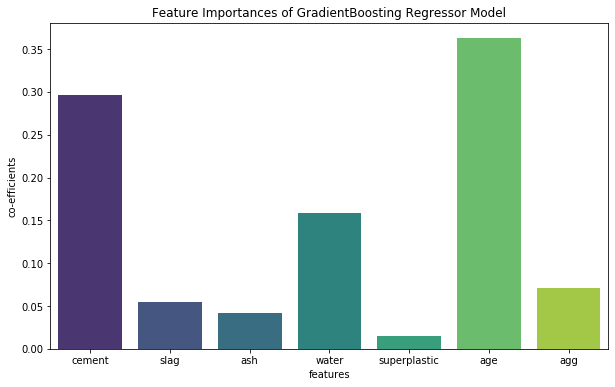

In [52]:
coef = pd.DataFrame(gb.feature_importances_)

coef['features'] = X_train.columns

plt.figure(figsize = (10, 6))
sns.barplot(coef['features'], coef[0], palette = 'viridis')

plt.ylabel('co-efficients')
plt.xlabel('features')
plt.title('Feature Importances of GradientBoosting Regressor Model')

### XGBoost Regressor

In [53]:
xgb = XGBRegressor(base_score = 0.5, booster = 'gbtree', colsample_bylevel = 1,
             colsample_bynode = 1, colsample_bytree = 1, gamma = 0,
             importance_type = 'gain', learning_rate = 0.1, max_delta_step = 0,
             max_depth = 3, min_child_weight = 1, missing = None, n_estimators = 100,
             n_jobs = 1, nthread = None, objective = 'reg:linear', random_state = 7,
             reg_alpha = 0, reg_lambda = 1, scale_pos_weight = 1, seed = None,
             silent = None, subsample = 1, verbosity = 1)

xgb.fit(X_train, y_train)

y_pred_xgb_tr = xgb.predict(X_train)
y_pred_xgb_val = xgb.predict(X_val)

xgb_tr_score = r2_score(y_train, y_pred_xgb_tr)
xgb_val_score = r2_score(y_val, y_pred_xgb_val)

print('Train R2 score: ', xgb_tr_score)
print('Validation R2 score: ', xgb_val_score)

[22:47:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train R2 score:  0.9391477823175982
Validation R2 score:  0.897631298431217


Now let's check the feature importance of all the columns.

Text(0.5, 1.0, 'Feature Importances of RandomForest Regressor Model')

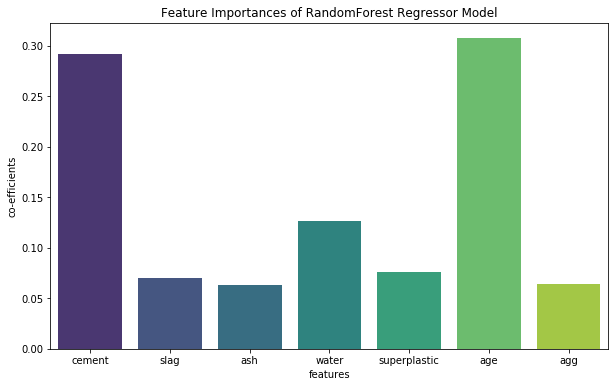

In [54]:
coef = pd.DataFrame(xgb.feature_importances_)

coef['features'] = X_train.columns

plt.figure(figsize = (10, 6))
sns.barplot(coef['features'], coef[0], palette = 'viridis')

plt.ylabel('co-efficients')
plt.xlabel('features')
plt.title('Feature Importances of RandomForest Regressor Model')

### Consodilated DataFrame of R2 Scores of all models

In [55]:
modellists = []

modellists.append(['Linear Regressor', lr_tr_score * 100, lr_val_score * 100])
modellists.append(['Ridge Regressor', ridge_tr_score * 100, ridge_val_score * 100])
modellists.append(['Lasso Regressor', lasso_tr_score * 100, lasso_val_score * 100])
modellists.append(['Polynomial (2) Regressor', lr_poly_2_tr_score * 100, lr_poly_2_val_score * 100])
modellists.append(['Polynomial (3) Regressor', lr_poly_3_tr_score * 100, lr_poly_3_val_score * 100])
modellists.append(['Decision Tree Regressor', dtpr_tr_score * 100, dtpr_val_score * 100])
modellists.append(['Random Forest Regressor', rfr_tr_score * 100, rfr_val_score * 100])
modellists.append(['AdaBoost Regressor', adb_tr_score * 100, adb_val_score * 100])
modellists.append(['Gradient Boosting Regressor', gb_tr_score * 100, gb_val_score * 100])
modellists.append(['XGBoost Regressor', xgb_tr_score * 100, xgb_val_score * 100])

mdl_df = pd.DataFrame(modellists, columns = ['Model', 'R2 Score of Training Data', 'R2 Score of Validation Data'])
mdl_df

,Model,R2 Score of Training Data,R2 Score of Validation Data
0,Linear Regressor,56.629677,64.920229
1,Ridge Regressor,56.629561,64.915112
2,Lasso Regressor,55.289599,62.024572
3,Polynomial (2) Regressor,70.601984,70.432745
4,Polynomial (3) Regressor,75.905184,74.992708
5,Decision Tree Regressor,81.500460,78.692192
6,Random Forest Regressor,93.556864,84.751663
7,AdaBoost Regressor,81.483426,79.269656
8,Gradient Boosting Regressor,99.029297,92.839432
9,XGBoost Regressor,93.914778,89.763130


Text(0.5, 1.0, 'Comparison of Regression Models')

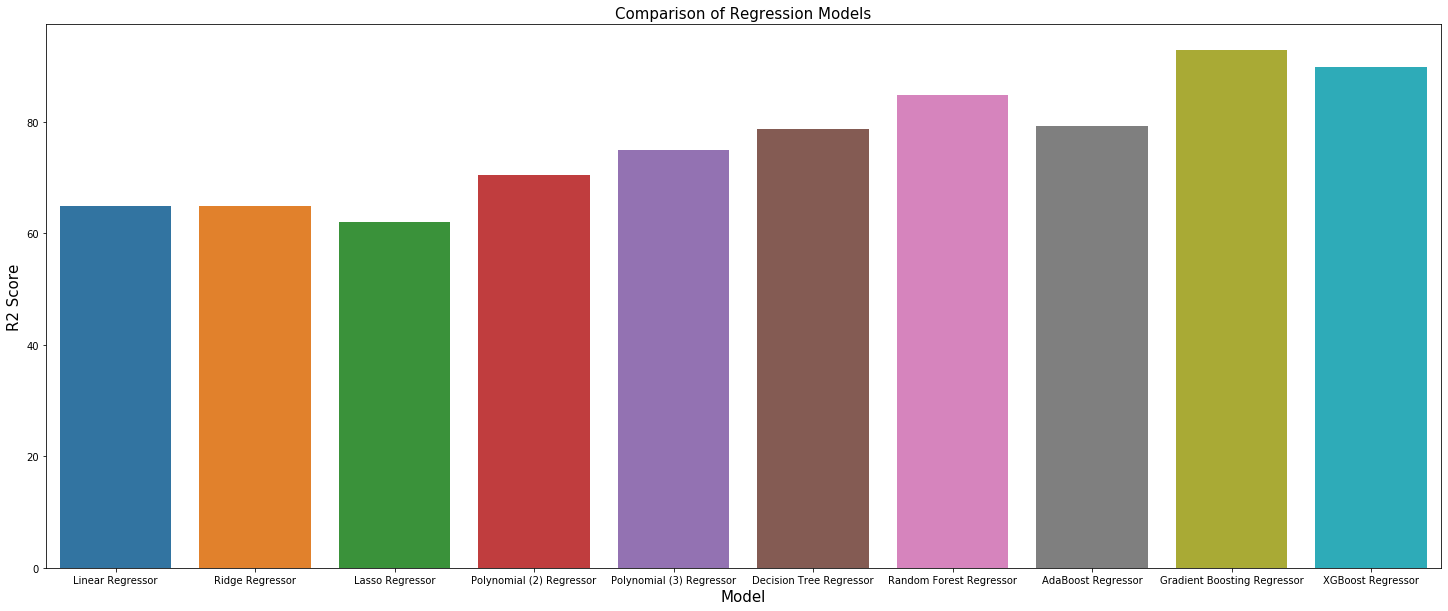

In [56]:
plt.figure(figsize = (25, 10))
sns.barplot(x = mdl_df['Model'], y = mdl_df['R2 Score of Validation Data'], data = mdl_df)
plt.xlabel('Model', fontsize = 15)
plt.ylabel('R2 Score', fontsize = 15)
plt.title('Comparison of Regression Models', fontsize = 15)

Since the XGBoost Regressor gives the best outcome, we will now pass the test dataset to the model to predict the R2 Score.

In [57]:
y_pred_xgb_test = xgb.predict(X_test)

xgb_test_score = r2_score(y_test, y_pred_xgb_test)
print('Test R2 score: ', xgb_test_score)

Test R2 score:  0.9067775904078896


It is seen that XGBoost Regressor gives a R2 score of 90.67% on the test data which is consistent with the scores provided on the training as well as the validation dataset.

Expected Model Performance Range at 95% Confidence Interval - 75% to 90% using Ensemble Techniques.